# Movie Recommendation System using keras

This notebook presents a movie recommendation system written in Keras

## Dataset Loading

In [1]:
import pandas as pd

train = pd.read_csv('../data/interim/train.csv')

train.head()

,user_id,item_id,rating,age,gender,occupation,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,749,240,1,33,0,13,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,637,363,2,30,0,13,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,432,111,4,22,0,5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,815,175,3,32,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,26,127,5,49,0,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
val = pd.read_csv('../data/interim/val.csv')

val.head()

,user_id,item_id,rating,age,gender,occupation,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,622,719,2,25,0,14,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,393,689,3,19,0,18,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,705,29,5,21,1,18,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,648,168,5,43,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,370,285,3,52,0,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('../data/interim/train.csv')

test.head()

,user_id,item_id,rating,age,gender,occupation,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,749,240,1,33,0,13,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,637,363,2,30,0,13,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,432,111,4,22,0,5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,815,175,3,32,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,26,127,5,49,0,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
movie_title = pd.read_csv('../data/interim/movie_title.csv')

movie_title.head()

,item_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


## Model

In [5]:
# !pip install tensorflow keras

In [6]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam

### Define the model

In [7]:
num_users = 943
num_items = 1682
num_genres = 19
num_occupations = len(train['occupation'].unique())
embedding_size = 10

In [8]:
# Create input layers
user_input = Input(shape=(1,), name='user_input')
item_input = Input(shape=(1,), name='item_input')
occupation_input = Input(shape=(1,), name='occupation_input')
age_input = Input(shape=(1,), name='age_input')
gender_input = Input(shape=(1,), name='gender_input')

In [9]:
# Create genre input layers
genre_inputs = []
genre_embeddings = []
for i in range(6, 25):  # Assuming genres start from column index 6 to 24
    input_layer = Input(shape=(1,), name=f'genre_input_{list(train)[i].lower()}')
    embedding_layer = Embedding(input_dim=2, output_dim=embedding_size, input_length=1)(input_layer)
    genre_inputs.append(input_layer)
    genre_embeddings.append(embedding_layer)

In [10]:
# Embedding layers
user_embedding = Embedding(input_dim=num_users+1, output_dim=embedding_size, input_length=1)(user_input)
item_embedding = Embedding(input_dim=num_items+1, output_dim=embedding_size, input_length=1)(item_input)
occupation_embedding = Embedding(input_dim=num_occupations+1, output_dim=embedding_size, input_length=1)(occupation_input)
age_embedding = Embedding(input_dim=80, output_dim=embedding_size, input_length=1)(age_input)
gender_embedding = Embedding(input_dim=2, output_dim=embedding_size, input_length=1)(gender_input)


In [11]:
concatenated_genre_embeddings = Concatenate(axis=1, name='concatenated_genre_embeddings')(genre_embeddings)

In [12]:
# Concatenate all embeddings
concatenated_embeddings = Concatenate(axis=1)([user_embedding, item_embedding, occupation_embedding, age_embedding, gender_embedding, concatenated_genre_embeddings])

In [13]:
# Flatten the concatenated embeddings
flattened_embeddings = Flatten()(concatenated_embeddings)

In [14]:
dense_layer_1 = Dense(64, activation='relu')(flattened_embeddings)
dropout_1 = Dropout(0.5)(dense_layer_1)
dense_layer_2 = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(dropout_1)
dropout_2 = Dropout(0.5)(dense_layer_2)
dense_layer_3 = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(dropout_2)
output_layer = Dense(1, activation='linear')(dense_layer_3)

In [15]:
# Create the model
model = Model(inputs=[user_input, item_input, occupation_input, age_input, gender_input] + genre_inputs, outputs=output_layer)

In [16]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

### Train model

In [17]:
# Train the model
history = model.fit(
    [train['user_id'], train['item_id'], train['occupation'], train['age'], train['gender']] + [train[list(train)[i]] for i in range(6, 25)],
    train['rating'],
    epochs=5,
    batch_size=64,
    validation_data=([val['user_id'], val['item_id'], val['occupation'], val['age'], val['gender']] + [val[list(train)[i]] for i in range(6, 25)] , val['rating'])
)

Epoch 1/5
1000/1000 [==============================] - 11s 7ms/step - loss: 2.0915 - val_loss: 1.0854
Epoch 2/5
1000/1000 [==============================] - 8s 8ms/step - loss: 1.0504 - val_loss: 1.0045
Epoch 3/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.9778 - val_loss: 0.9942
Epoch 4/5
1000/1000 [==============================] - 8s 8ms/step - loss: 0.9387 - val_loss: 1.0013
Epoch 5/5
1000/1000 [==============================] - 9s 9ms/step - loss: 0.9166 - val_loss: 0.9504


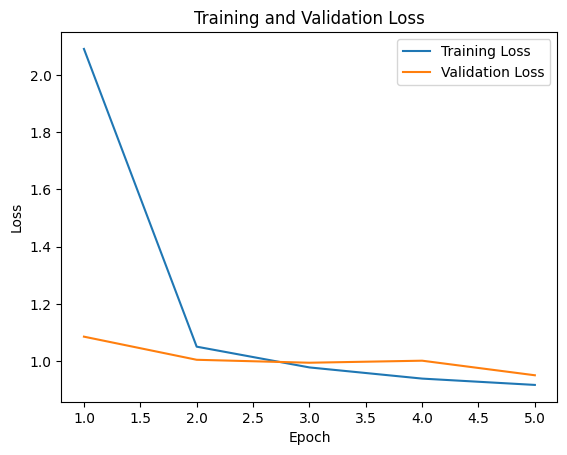

In [18]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(range(1, 6), history.history['loss'], label='Training Loss')
plt.plot(range(1, 6), history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Evaluation

In [19]:
loss = model.evaluate(
    [test['user_id'], test['item_id'], test['occupation'], test['age'], test['gender']] + [test[list(train)[i]] for i in range(6, 25)],
    test['rating'])

print(f'RMSE: {loss**0.5}')

2000/2000 [==============================] - 6s 3ms/step - loss: 0.8820
RMSE: 0.9391622112736011


### Save model

In [24]:
model.save('../models/model.keras')

## Test

In [20]:
def get_recommendations(user_id, model, data, k=5):

    # Filter input data for the specified user
    user_data = data[data['user_id'] == user_id]

    predictions = model.predict([
        user_data['user_id'],
        user_data['item_id'],
        user_data['occupation'],
        user_data['age'],
        user_data['gender']]
        + [user_data[list(train)[i]] for i in range(6, 25)])

    recommendations = pd.DataFrame({'item_id': user_data['item_id'], 'predicted_rating': predictions.flatten()})

    # Sort the recommendations by predicted rating
    top_k_recommendations = recommendations.sort_values(by='predicted_rating', ascending=False).head(k)

    return top_k_recommendations['item_id'].tolist()

In [21]:
user_id = 26

top_recommendations = get_recommendations(user_id, model, test)

print("Top 5 Recommended Books:")
movie_title[movie_title['item_id'].isin(top_recommendations)]

3/3 [==============================] - 0s 6ms/step
Top 5 Recommended Books:


,item_id,movie_title
49,50,Star Wars (1977)
99,100,Fargo (1996)
126,127,"Godfather, The (1972)"
301,302,L.A. Confidential (1997)
312,313,Titanic (1997)


In [22]:
user_id = 815

top_recommendations = get_recommendations(user_id, model, test)

print("Top 5 Recommended Books:")
movie_title[movie_title['item_id'].isin(top_recommendations)]

4/4 [==============================] - 0s 7ms/step
Top 5 Recommended Books:


,item_id,movie_title
173,174,Raiders of the Lost Ark (1981)
312,313,Titanic (1997)
317,318,Schindler's List (1993)
356,357,One Flew Over the Cuckoo's Nest (1975)
602,603,Rear Window (1954)


In [23]:
user_id = 432

top_recommendations = get_recommendations(user_id, model, test)

print("Top 5 Recommended Books:")
movie_title[movie_title['item_id'].isin(top_recommendations)]

2/2 [==============================] - 0s 7ms/step
Top 5 Recommended Books:


,item_id,movie_title
49,50,Star Wars (1977)
92,93,Welcome to the Dollhouse (1995)
99,100,Fargo (1996)
312,313,Titanic (1997)
314,315,Apt Pupil (1998)
